In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN


from sklearn.model_selection import cross_val_score



C:\Users\hp\AppData\Local\Temp\ipykernel_15132\3519065614.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("D:/INTERNSHIP/year-2-phase-2/Capstone project/cleaned_sports_dataset .csv")


In [4]:
X = df[['PassCompletionRate', 'Assists']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iforest = IsolationForest(contamination=0.1)
iforest.fit(X_scaled)

outlier_scores = iforest.decision_function(X_scaled)
outlier_labels = iforest.predict(X_scaled)

outliers = df[outlier_labels == -1]
print("Outliers:")
print(outliers)

Outliers:
       Sl_no  Unnamed    Player    Team   Age      Height      Weight  \
3          4      3.0  Player C  Team C  29.0  184.567349   54.390918   
32        33     32.0  Player D  Team B  29.0  188.478929  103.001664   
34        35     34.0  Player B  Team B  38.0  187.928618   66.180596   
39        40     39.0  Player C  Team C  32.0  181.177430  110.715791   
45        46     45.0  Player D  Team C  22.0  162.989836   84.722093   
...      ...      ...       ...     ...   ...         ...         ...   
16560  16561    394.0  Player C  Team B  22.0  168.394587  101.687415   
16562  16563   1550.0  Player A  Team B  36.0  188.478929  110.715791   
16568  16569   3207.0  Player C  Team C  20.0  185.584669   89.593964   
16580  16581   3808.0  Player A  Team C  19.0  188.478929  110.715791   
16589  16590    468.0  Player A  Team B  26.0  170.791842   89.593964   

         Position      Goals  Assists  ...  TrainingHours  \
3         Forward  13.000000      1.0  ...      19.3

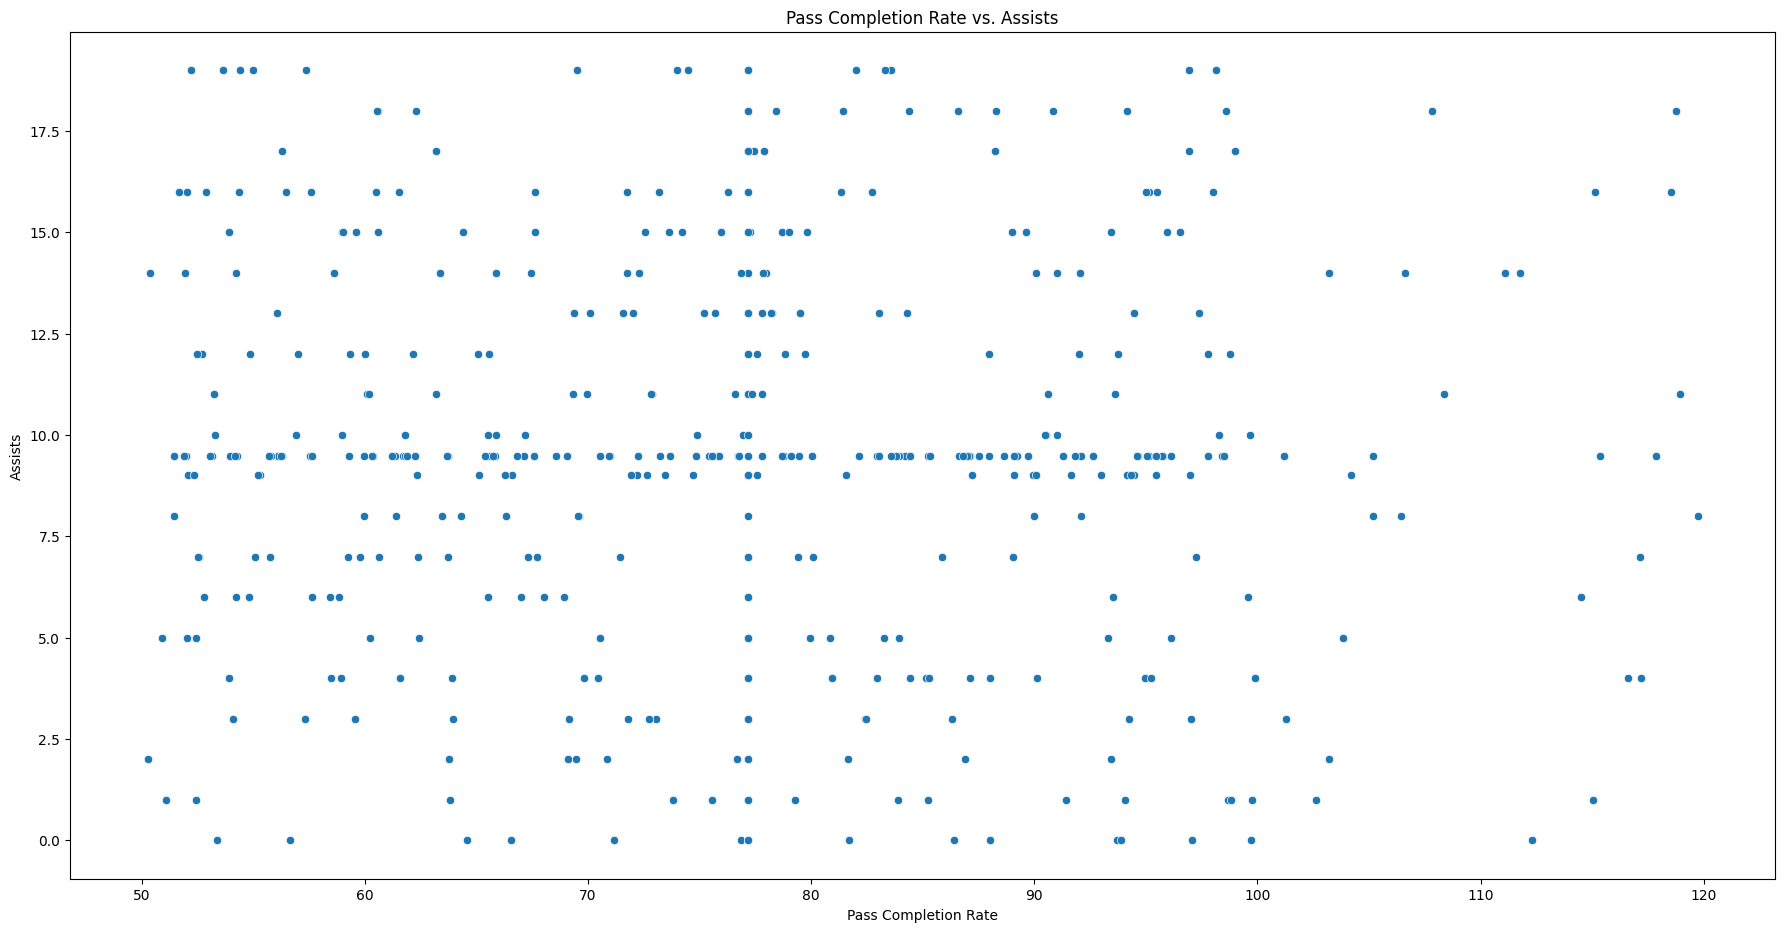

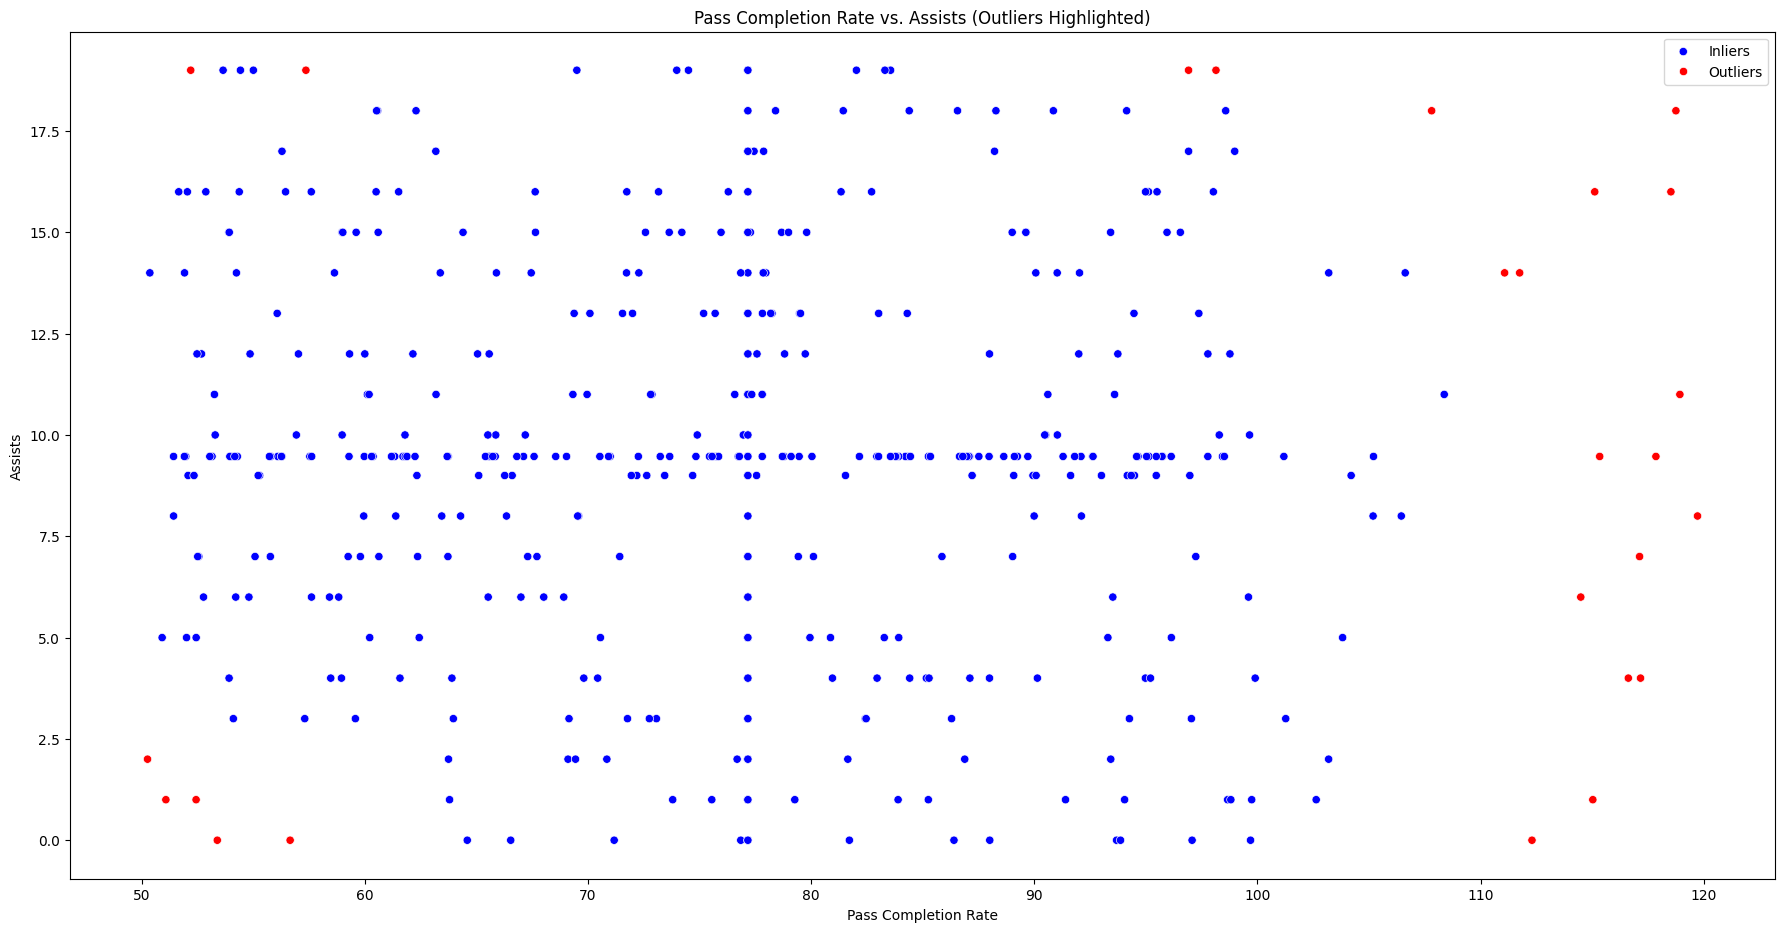

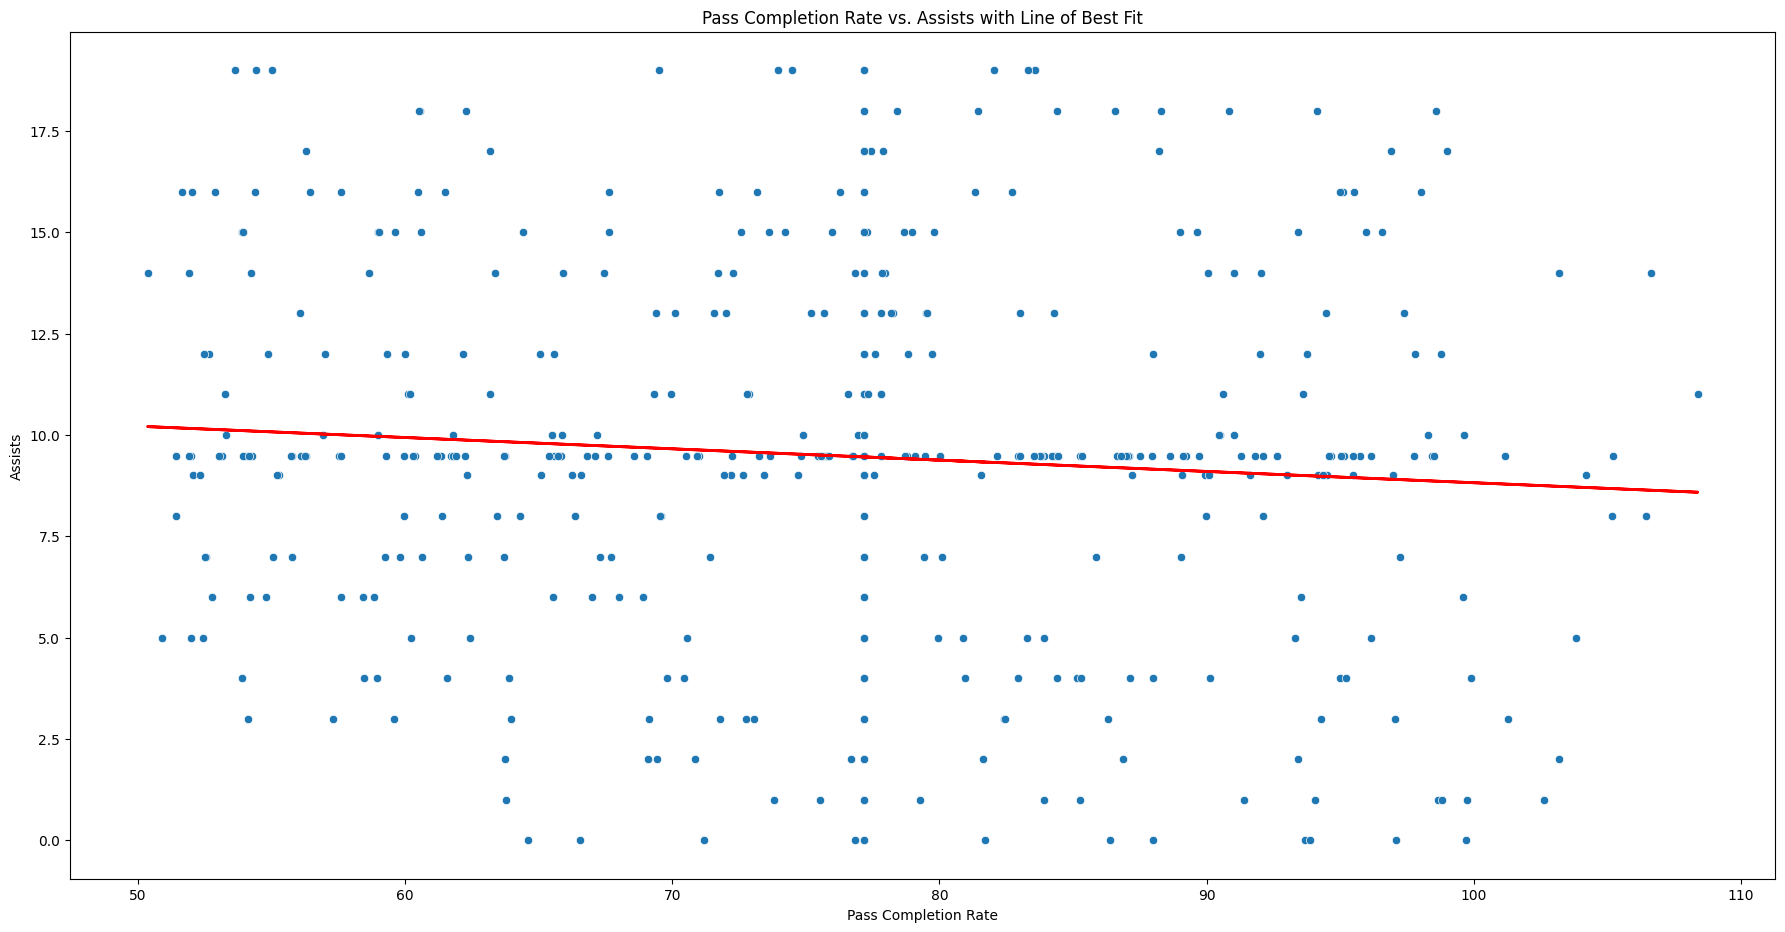

R-squared: 0.00663551469262702


In [7]:


# Load the dataset
file_path = 'D:/INTERNSHIP/year-2-phase-2/Capstone project/cleaned_sports_dataset .csv'
df= pd.read_csv(file_path)
df=df.head(500)
# Filter necessary columns and drop missing values
data= df[['PassCompletionRate', 'Assists']].dropna()

# Scatter plot
plt.figure(figsize=(22, 11))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=data)
plt.title('Pass Completion Rate vs. Assists')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(data)

# Mark the outliers
data['Outlier'] = outliers

# Scatter plot with outliers
plt.figure(figsize=(22, 11))
sns.scatterplot(x='PassCompletionRate', y='Assists', hue='Outlier', data=data, palette={1: 'blue', -1: 'red'})
plt.title('Pass Completion Rate vs. Assists (Outliers Highlighted)')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.legend(['Inliers', 'Outliers'])
plt.show()

# Remove outliers from the data
cleaned_data = data[data['Outlier'] == 1]

# Regression analysis
X = cleaned_data[['PassCompletionRate']]
y = cleaned_data['Assists']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions for plotting the line of best fit
y_pred = model.predict(X)

# Scatter plot with line of best fit
plt.figure(figsize=(22, 11))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=cleaned_data)
plt.plot(cleaned_data['PassCompletionRate'], y_pred, color='red', linewidth=2)
plt.title('Pass Completion Rate vs. Assists with Line of Best Fit')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

# Model evaluation

r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

# # Cross-validation
# cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
# print(f'Cross-Validation R-squared Scores: {cv_scores}')
# print(f'Average Cross-Validation R-squared Score: {np.mean(cv_scores)}')